# Clase 102 - Análisis de Datos

> Programación Python en el Ámbito Científico
>
> [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/pycien-2023](https://github.com/dragonnomada/pycien-2023)

**Contenido**

* Fuentes de datos
* Adquisición de datos
* Extraer datos de archivos CSV
* Análisis de la Varianza (ANOVA)
* Distribuciones y Densidades
* Correlación de Datos
* Regresiones
* Clasificadores

## Fuentes de Datos

El análisis de datos parte de fuentes de datos que contienen la información de análisis en una forma no estructurada. Por ejemplo, si quisieramos analizar reseñas de comentarios sobre productos en una tienda en línea, tendríamos que adquirir la información estructurada de alguna forma, por ejemplo, un archivo de texto que en una línea tenga el nombre del producto, en la siguiente línea el nombre del usuario que hace la reseña y su corre, en la siguiente línea la calificación que otorgó y la fecha y en las susesivas líneas la reseña.

> Ejemplo de dos reseñas de productos

```
Freidora de Aire Ninja
Ana Pérez (ana@gmail.com)
4 de 5, 14 de marzo de 2023
Me pareció ideal para cocinar, pero le faltan instrucciones más claras
y un recetario ya que sólo incluía platillos básicos, pero no sé como
configurarla para platillos más sofisticados.

Aspiradora iBot
José Pacheco (pacheco@hotmail.com)
3 de 5, 17 de junio de 2023
Barre bien y le dura bastante la pila (2 horas), pero se queda atorada si
hay una extensión suelta o una silla con borde en suelo, por lo que no
se puede dejar así o se acabará su batería atorado.

```

No toda la información está correctamente estructurada y eso hace dificil su adquisición.

La forma de estructurar la información es reconociendo los patrones detrás de esta información y logrando etiquetar la información en datos.

* **Información** - Representa valores y relaciones que existen en la naturaleza y son piezas continuas de datos, es decir, la información genera datos, pero no está siendo retenida hasta que se mide o se captura.
* **Datos** - Representan capturas de información, es decir, valores etiquetados y almacenados para su manipulación o procesamiento.

Si la información estuviera mejor estructurada, sería más sencillo recuperarla y poder utilizarla en un programa.

Por ejemplo, si las reseñas estuvieran en formato JSON, CSV, Excel o en Bases de Datos.

> Ejemplo de las dos reseñas estructuradas en formato JSON

```json
[
  {
    "producto": "Freidora de Aire Ninja",
    "usuario": "Ana Pérez",
    "correo": "ana@gmail.com",
    "valoracion": 4,
    "maxima_valoracion": 5,
    "fecha": "2023/03/14",
    "texto": "Me pareció ideal para cocinar, pero le faltan instrucciones más claras y un recetario ya que sólo incluía platillos básicos, pero no sé como configurarla para platillos más sofisticados."
  },
  {
    "producto": "Aspiradora iBot",
    "usuario": "José Pacheco",
    "correo": "pacheco@hotmail.com",
    "valoracion": 3,
    "maxima_valoracion": 5,
    "fecha": "2023/06/17",
    "texto": "Barre bien y le dura bastante la pila (2 horas), pero se queda atorada si hay una extensión suelta o una silla con borde en suelo, por lo que no se puede dejar así o se acabará su batería atorado."
  }
]
```

> Ejemplo de las dos reseñas estructuras en formato CSV

```csv
Producto, Usuario, Correo, Valoracion, Fecha, Texto,
Freidora de Aire Ninja, Ana Pérez, ana@gmail.com, 4, 2023/03/14, "Me pareció ideal para cocinar, pero le faltan instrucciones más claras y un recetario ya que sólo incluía platillos básicos, pero no sé como configurarla para platillos más sofisticados.",
Aspiradora iBot, José Pacheco, pacheco@hotmail.com, 3, 2023/06/17, "Barre bien y le dura bastante la pila (2 horas), pero se queda atorada si hay una extensión suelta o una silla con borde en suelo, por lo que no se puede dejar así o se acabará su batería atorado.",
```

Como observar entre mejor estructurada esté la información, más fácil será consumirla, es decir, adquirirla en nuestro programa y poder manipularla para hacer análisis de datos.

Por ejemplo, si tenemos un archivo CSV con 10,000 reseñas, podríamos preguntarnos las siguientes preguntas de análisis:

1. ¿Cuál es la valoración promedio general?
2. ¿Cuál es la valoración promedio de cada año?
3. ¿Cuál es la valoración promedio de cada mes de año?
4. ¿Cuál es la valoración promedio de cada semana del año?
5. ¿Cuál es la valoración promedio de los lunes, martes, miércoles, jueves, viernes, sábados y domingos?
6. ¿Cuáles son 10 productos con mejor reseña?
7. ¿Cuáles son 20 productos con peor reseña?
8. ¿Cuántas reseñas tiene cada correo o cuáles son los correos con más reseñas?
9. ¿Cuál es la temporada con mejores reseñas sobre los mismos productos?
10. ¿Cuáles son los grupos de reseñas que utilizan palabras similares?

### Ejemplo de una fuente de datos

Datos sobre factores que influyen el diseño de un fraccionamiento

Ejes de datos:

1. Ubicación (`Coordena latitud, longitud`)
2. Número de niveles (`Entero`)
3. Tipo de compra (`Categórico Crédito | Contado`)
4. Objetivo de ocupación (`Categórico Familiar | Soltero Trabajador | Soltero Jubilado | Pareja Joven | Pareja Retiro`)
5. Tiene patio (`Categoríco SI | NO`)
6. Usa transporte público (`Categoríco SI | NO`)
7. Tiene carro (`Categoríco SI | NO`)
8. Para habitar o rentar (`Categoríco Habitar | Rentar`)

Muestras:

```csv
UBICACION, NIVELES, TIPO, OBJETIVO, PATIO, TRANSPORTE, CARRO, USO,
"25.688731,-100.372857", 2, CREDITO, FAMILIAR, SI, SI, SI, HABITAR,
"25.689142,-100.370030", 2, CONTADO, PJOVEN, NO, NO, SI, HABITAR,
"25.690060,-100.370330", 1, CONTADO, STRABAJADOR, NO, SI, NO, RENTAR,
```

### Ejemplo de preguntas de análisis sobre la fuente de datos

1. ¿Cuántos usuarios prefieren casas cercanas a la caseta a una distancia máxima de 100 metros?
2. ¿Cuáles son los porcentajes por niveles de planta?
3. ¿Cuál es el porcentaje para Crédito?
4. ¿Cuál es el tipo de usuario mayor?
5. ¿Cuál es el porcentaje de usuarios que tienen carro?

### Ejercicio: E201 - Diseña una fuente de datos CSV

Diseña una fuente de datos en formato CSV que contenga al menos 5 muestras en distintos ejes de datos (al menos 5 también).

Por ejemplo, en las reseñas usamos los siguientes ejes de datos:

1. Nombre del producto (`Texto`)
2. Nombre del usuario (`Texto`)
3. Correo el usuario (`Texto usuario@dominio`)
4. Valoración de la reseña (`Entero`)
5. Fecha de la reseña (`Fecha Entero/Entero/Entero`)
6. Texto de la reseña (`Texto`)

Crea una lista con tus propios de ejes de datos (que serán las columnas) y por cada fila crea un registro o una muestra con valores reales o ficticios.

Algunas ideas son:

* Muestras de un experimento de laboratorio
* Datos generales sobre personas
* Datos de proyectos de construcción
* Encuestas psicológicas a empleados
* Datos sobre las preferencias de un cliente


> E201 - SOLUCIÓN AQUÍ

### Ejercicio: E202 - Diseña preguntas de análisis

Diseña al menos 10 preguntas de análisis sobre la fuente de datos que diseñaste anteriormente.

Puedes pensar en qué datos podrías extraer de tu información, por ejemplo, si es numérica pensar en promedios, mínimos y máximos, si es categórica en conteos y segmentaciones a otros ejes, si es de texto en palabras claves, sentimiento del texto, similitudes entre textos, y si es geoespacial distancias a otros puntos o entre los puntos.

> E202 - SOLUCIÓN AQUÍ

## Adquisición de datos

Para comenzar a trabajar los datos en Python es importante dominar algunas librerías como [Numpy](https://numpy.org) y [Pandas](https://pandas.pydata.org).

La librería de *numpy* nos permite manipular arreglos n-dimensionales, como pueden ser los vectores y las matrices.

La librería de *pandas* nos permite manipular series de datos (columnas simples) y dataframes (tablas o conjuntos de columnas) para hacer adquisición de datos desde distintas fuentes.

### Ejemplo de la creación de un arreglo 1-dimensional con numpy

El arreglo 1-dimensional es un vector o serie de datos que se puede construir de varias formas con numpy, la más sencilla es a través de listas de python.

In [1]:
# Importación de la librería científica de numpy con apodo "np"
import numpy as np

# Representa un vector o columna de datos, por ejemplo, calificaciones, etc.
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])

x

array([1, 2, 3, 4, 5, 6, 7, 8])

### Ejemplo de la creación de un arreglo 2-dimensional con numpy

El arreglo 2-dimensional es una matriz o tabla de datos que se puede construir de varias formas con numpy, la más sencilla es a través de listas de python.

In [2]:
import numpy as np

# Representa una matriz o tabla de datos, por ejemplo, muestras
# en varios ejes como calificaciones, edad, precio, etc.
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Ejemplo de la creación de una serie de datos con pandas

La Serie de datos representa una columna o eje de datos similar a un vector. La forma más sencilla de crear una serie es a partir de una lista de python.

In [3]:
# Importación de la librería científica de pandas con apodo "pd"
import pandas as pd

# Representa una serie de valores para una columna de datos,
# por ejemplo, edades, pesos, precios, etc.
s1 = pd.Series([15, 23, 2, 4, 6, 17])

s1

0    15
1    23
2     2
3     4
4     6
5    17
dtype: int64

### Ejemplo de una tabla de datos con pandas

El DataFrame representa una tabla de datos, donde por cada fila se tendrán los datos de una muestra en múltiples columnas, cada columna será una serie o eje de datos.

In [4]:
import pandas as pd

d1 = pd.DataFrame({
    "A": [1, 2, 3, 4],
    "B": [5, 6, 7, 8],
    "C": [9, 10, 11, 12]
})

d1

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


### Ejercicio: E203 - Diseña un arreglo 1-dimensional de numpy

Crea un arreglo 1-dimensional para guardar 10 calificaciones distintas

In [ ]:
# E203 - SOLUCIÓN AQUÍ

### Ejercicio: E204 - Diseña un arreglo 2-dimensional de numpy

Crea un arreglo 2-dimensional para guardar 10 muestras de edades, pesos y estaturas.

Debes crear una matriz de 10 filas por 3 columnas como la siguiente:

|Edad|Peso|Estatura|
|:-:|:-:|:-:|
|23|76.5|1.89|
|25|56.2|1.56|
|33|65.3|1.67|
|17|43.1|1.73|
|19|42.9|1.52|
|14|37.3|1.45|
|45|98.4|1.67|
|28|44.2|1.72|
|29|71.3|1.54|
|21|60.9|1.49|

In [ ]:
# E204 - SOLUCIÓN AQUÍ

### Ejercicio: E205 - Diseña una serie de pandas

Crea una Serie para guardar 15 medidas de tornillos.

In [ ]:
# E205 - SOLUCIÓN AQUÍ

Ejercicio: E206 - Diseña un dataframe de pandas

Crea un DataFrame con las columnas Temperatura, Humedad, PH y Biomasa y genera 20 muestras de cada uno.

In [ ]:
# E206 - SOLUCIÓN AQUÍ

## Extraer datos de archivos CSV

La forma más directa de adquirir datos manipulables para hacer análisis de datos es mediante archivos de texto plano con extensión CSV.

Estos consisten en valores separados por comas (`,`). Si estos contienen texto que a su vez contengan comas será obligatorio encerrar dicho texto entre comillas dobles (`"..."`).

> Ejemplo de un archivo CSV llamado `datos.csv`

```csv
A,B,C,
1,2,3,
4,5,6,
7,8,9,
10,11,12,13,
```

**Nota:** Debemos cuidar el uso de espacios después de las comas ya que podría interferir con los datos.

La manera más fácil es crear una hoja de Excel y exportarla como archivo CSV separado por comas.

Otra alternativa al uso de las comas son las variantes para punto y coma (`;`) y dos puntos (`:`).

> Ejemplo de exportación de Excel a CSV

![Exportar de Excel a CSV](https://www.spreadsheetclass.com/wp-content/uploads/2020/10/Example-of-how-to-export-a-CSV-from-a-Google-spreadsheet-Clicking-File-then-Download-then-Comma-separated-values.jpg)

### Extracción de datos CSV con pandas

La librería científica de python llamada **[Pandas](https://pandas.pydata.org)** nos permitirá cargar archivos CSV como *DataFrames* o *Datasets*, los cuales representan columnas o ejes de datos replicados en muestras, tal cual un CSV.

La función `data = pandas.read_csv(<ruta>)` nos permitirá recuperar el dataset de valores y manipularlos de diferentes maneras.

Los parámetros para configurar si el CSV tiene la primer fila como cabeceras, el número de filas a ignorar, el nombre de las columnas y más podemos consultarlo en:

> Documentación de `pandas.read_csv(...)**texto en negrita**`

[https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

### Subir archivos a Google Colab

Podemos subir archivos para accederlos usando el ícono de carpeta ubicado en la barra lateral izquierda (el último de los iconos superiores).

![Subir un archivo a Google Colab](https://i.stack.imgur.com/anuvQ.png)

### Ejemplo para adquirir los datos de un CSV con pandas

El archivo CSV disponible en:

[https://people.sc.fsu.edu/~jburkardt/data/csv/biostats.csv](https://people.sc.fsu.edu/~jburkardt/data/csv/biostats.csv)

Contiene los siguientes datos:

```csv
"Name",     "Sex", "Age", "Height (in)", "Weight (lbs)"
"Alex",       "M",   41,       74,      170
"Bert",       "M",   42,       68,      166
"Carl",       "M",   32,       70,      155
"Dave",       "M",   39,       72,      167
"Elly",       "F",   30,       66,      124
"Fran",       "F",   33,       66,      115
"Gwen",       "F",   26,       64,      121
"Hank",       "M",   30,       71,      158
"Ivan",       "M",   53,       72,      175
"Jake",       "M",   32,       69,      143
"Kate",       "F",   47,       69,      139
"Luke",       "M",   34,       72,      163
"Myra",       "F",   23,       62,       98
"Neil",       "M",   36,       75,      160
"Omar",       "M",   38,       70,      145
"Page",       "F",   31,       67,      135
"Quin",       "M",   29,       71,      176
"Ruth",       "F",   28,       65,      131
```

Descargaremos el archivo y lo subiremos a Google Colab. Luego copiaremos la ruta pulsando `Copy path` en el archivo como se muestra en la imagen:

![Copy path Google Colab](https://i.stack.imgur.com/mYWnb.png)

#### 1. Importamos la librería de pandas

In [5]:
import pandas as pd

#### 2. Importamos los datos desde la ruta del archivo

Importamos los datos desde la ruta del archivo usando la función `pd.read_csv(<ruta>)`
>
> Generalmente dice `/content/<archivo>.csv` en Google Colab

In [6]:
data = pd.read_csv("/content/biostats.csv")

#### 3. Inspeccionamos los datos

Inspeccionamos los datos con `print(data)` o como resultado de la celda


> Cuándo tenemos muchos registros pandas sólo nos mostrará algunos

In [7]:
data

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)"""
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124
5,Fran,"""F""",33,66,115
6,Gwen,"""F""",26,64,121
7,Hank,"""M""",30,71,158
8,Ivan,"""M""",53,72,175
9,Jake,"""M""",32,69,143


#### 4. Obtenemos la información del dataset

Obtenemos la información del dataset con `data.info()`

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             18 non-null     object
 1        "Sex"       18 non-null     object
 2    "Age"           18 non-null     int64 
 3    "Height (in)"   18 non-null     int64 
 4    "Weight (lbs)"  18 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 848.0+ bytes


**NOTA:** Observa que la columna "Sex" contiene muchos espacios y algunas columnas tienen nombres malformados.

Las primeras dos columnas son de texto y las restantes de números enteros.

#### 5. Describimos el dataset

Describimos los estadísticos fundamentales del dataset usando `data.describe()`

In [9]:
data.describe()

,"""Age""","""Height (in)""","""Weight (lbs)"""
count,18.000000,18.000000,18.000000
mean,34.666667,69.055556,146.722222
std,7.577055,3.522570,22.540958
min,23.000000,62.000000,98.000000
25%,30.000000,66.250000,132.000000
50%,32.500000,69.500000,150.000000
75%,38.750000,71.750000,165.250000
max,53.000000,75.000000,176.000000


Observa que sólo las columnas numéricas pueden ser descritas estadísticamente. Automáticamente calculara el total de muestras, el promedio, la desviación estándar, el mínimo, el cuartil 1, 2, 3 y el máximo.

#### 6. Inspeccionamos una muestra aleatoria de los datos

Inspeccionamos una muestra aleatoria de los datos con `data.sample(<**n**>)`

In [10]:
data.sample(5)

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)"""
2,Carl,"""M""",32,70,155
11,Luke,"""M""",34,72,163
17,Ruth,"""F""",28,65,131
3,Dave,"""M""",39,72,167
10,Kate,"""F""",47,69,139


Observa que la muestra aleatoria toma algunos registros y sus valores, para inspeccionar qué valores podemos encontrar dentro del conjunto de datos.

### Ejercicio: E206 - Carga los archivos de ejemplo de Google Colab

Los archivos de la libreta de Google Colab y en la carpeta `sample_data` copia la ruta de `/content/sample_data/california_housing_train.csv` la cual contiene datos de entrenamiento para predecir el valor de una casa.

El CSV contiene 3,000 registros, así que usa muestras aleatorias para sólo ver como se comportan algunas muestras.

Obtén la información y descripción estadística del conjunto de datos.

Los valores deberían lucir como:

|longitude|latitude|housing\_median\_age|total\_rooms|total\_bedrooms|population|households|median\_income|median\_house\_value|
|---|---|---|---|---|---|---|---|---|
|-122\.050000|37\.370000|27\.000000|3885\.000000|661\.000000|1537\.000000|606\.000000|6\.608500|344700\.000000|
|-118\.300000|34\.260000|43\.000000|1510\.000000|310\.000000|809\.000000|277\.000000|3\.599000|176500\.000000|
|-117\.810000|33\.780000|27\.000000|3589\.000000|507\.000000|1484\.000000|495\.000000|5\.793400|270500\.000000|
|-118\.360000|33\.820000|28\.000000|67\.000000|15\.000000|49\.000000|11\.000000|6\.135900|330000\.000000|
|-119\.670000|36\.330000|19\.000000|1241\.000000|244\.000000|850\.000000|237\.000000|2\.937500|81700\.000000|
|-119\.560000|36\.510000|37\.000000|1018\.000000|213\.000000|663\.000000|204\.000000|1\.663500|67000\.000000|
|-121\.430000|38\.630000|43\.000000|1009\.000000|225\.000000|604\.000000|218\.000000|1\.664100|67000\.000000|
|-120\.650000|35\.480000|19\.000000|2310\.000000|471\.000000|1341\.000000|441\.000000|3\.225000|166900\.000000|
|-122\.840000|38\.400000|15\.000000|3080\.000000|617\.000000|1446\.000000|599\.000000|3\.669600|194400\.000000|
|-118\.020000|34\.080000|31\.000000|2402\.000000|632\.000000|2830\.000000|603\.000000|2\.333300|164200\.000000|

In [ ]:
# E206 - SOLUCIÓN AQUÍ

## Análisis de la Varianza (ANOVA)

Una columna o eje de datos representa una variable aleatoria que toma distintos valores sobre una misma característica, por ejemplo, la edad de una persona, su peso, altura, si está casado, el precio de un producto, sus existencias, el departamento comercial al que pertenece, la temperatura en un experimento, el PH, la densidad, el tiempo de medición, la fecha, etc.

A estos los llamaremos en general **Ejes de Análisis** o *ejes de datos*.

Cuándo nos centramos en analizar un eje de datos, por ejemplo, el tamaño de un tornillo que fue producido por una máquina moldeadora de tornillos, entonces centraremos el análisis en un **Análisis Univariable**, cuándo se analizan más ejes de de datos se realiza un *Análisis Multivariable*.

El **Análisis de la Varianza** o *ANOVA* se centra en determinar si un eje de datos se comporta de forma estándar a través de estudiar el comportamiento de su *varianza* y *desviación media* o *desviación estándar*.

### Promedio, Varianza y Desviación estándar

El promedio en un eje de datos $x$ está representado por la suma ponderada de los valores que toma $x$ a lo largo de todas las muestras posibles.

Como generalmente tenemos acceso solo a una parte de todas las posibles muestras, centramos el análisis en un conjunto de muestras llamada **Población Muestral** que es parte de una **Población Total** o *población ideal*.

Entonces, el promedio de la *población muestral* será cada vez más cercano al promedio de la *población total*, si tomamos poblaciones muestrales cada vez más grandes.

Por ejemplo, si realizamos 50 encuestas de satisfacción a alumnos que tomaron una materia en la escuela, este promedio será próximo al promedio de todos los alumnos que han tomado esa materia, por ejemplo, 50,000 en 10 años que se ha impartido dicha materia.

Obviamente hay sesgos en el análisis, por ejemplo, la materia podría tener profesores distintos, el plan académico se pudo haber modificado, etc.

Si dentro de un mismo salón de clases levantaramos 5 encuestas aleatorias, es probable que sea significativo para reflejar la satisfacción general del grupo de 40 alumnos. Y entre más grande sea la población muestral, por ejemplo, preguntar a 10 en lugar de 5, entonces el promedio será cada vez más cercano al de la población total.

Esto es válido cuándo la variable se comporta de manera estándar, es decir, si los datos tienen una tendencia central que sea predecible.

Veamos como se comporta la tendencia en diferentes ejes de análisis.

### Ejemplo de un eje de análisis para las edades de personas

Si preguntamos las edades en un salón de clases, podemos obtener los siguientes datos:

In [11]:
import numpy as np

edades = np.array([23, 25, 26, 27, 24, 45, 33, 28, 25, 26, 27, 21])

edades

array([23, 25, 26, 27, 24, 45, 33, 28, 25, 26, 27, 21])

A simple vista las edades están entre los 20 años y los 45 años, pero podemos observar que casi todas las edades están próximas a 25, quizás más o menos.

### Promedio de las edades

Podemos calcular el promedio de las edades sumando todas y dividiendo entre el número de elementos, según la ecuación.

$\overline{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

> El promedio de un eje de datos $x$ es la suma de los $x_i$ entre el número de datos (la cardinalidad de $|x|$).

Con numpy bastaría pedirle al eje de datos su promedio con `x.mean()`

In [12]:
 edades.mean()

27.5

### Varianza de las edades

La varianza representa qué tanto se aleja cuadráticamente un dato del promedio de los datos. Esto significa que la suma de las áreas entre los valores y el promedio será muy alta si los valores se devian mucho del promedio.

Por ejemplo, si las edades estuvieran entre 0 y 100 años y el promedio fuera cercano a los 50 años, entonces la varianza sería alta, ya que alguien de 0 años distaria mucho del promedio que es 50 años y alguien de 100 años lo mismo.

Sin embargo si la mayor parte de las edades estuviera cerca de los 50 años, quizás la varianza no sería tan alta, ya que las áreas serían casi cero.

La siguiente ecuación representa la varianza de un eje de datos.

$VAR(x) = \frac{\sum_{i = 1}^{n} (x_i - \overline{x})^2}{n}$

Recordemos que la varianza está en términos cuadráticos, por lo que no es evidente que su valor represente algo en concreto. Pero podríamos compararla contra el promedio elevado al cuadrado, para intuir si es grande o no lo es.

Podríamos que pensar que la varianza es muy alta si todos los datos son dos veces el promedio, aunque teoricamente esto sería improbable, acercarse a este valor significaría que los datos están demasiado alejados.

$VAR(x) ≃ \overline{x}$

Aunque usaremos la desviación estándar y los intervalos de confianza para validar esto.

Con numpy podemos obtener la varianza de un eje de datos con `x.var()`

In [13]:
edades.var()

35.75

### Desviación estándar de las edades

La varianza no tiene un valor estandarizado, por lo que es difícil interpretarla ya que tiene unidades cuadráticas.

Pero si obtenemos la raíz cuadrada de la varianza, encontraremos la desviación estándar, la cuál tendrá la misma magnitud que el eje.

La ecuación para determinar la desviación estándar es simplemente calcular raíz cuadrada de la varianza.

$STD(x) = \sqrt{VAR(x)} = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - \overline{x})^2}{n}}$

La desviación estándar representa que tanto se aleja un dato de otro en la misma magnitud de los datos.

Lo más interesante es que podemos construir intervalos de confianza que nos dirán en qué rango se encuentra cierto porcentaje de los datos como se muestra en la tabla.

* $(\overline{x} - θ, \overline{x} + θ)$ - Representa el 66% de los datos aproximadamente
* $(\overline{x} - 2 \cdot θ, \overline{x} + 2 \cdot θ)$ - Representa el 95% de los datos aproximadamente
* $(\overline{x} - 3 \cdot θ, \overline{x} + 3 \cdot θ)$ - Representa el 99.5% de los datos aproximadamente

Donde $θ = STD(x)$ es la desviación estándar.

Con numpy podemos calcular la desviación estándar con de un eje de datos `x.std()` o `x.var() ** 0.5`

In [14]:
x.std()

2.29128784747792

In [15]:
x.var() ** 1/2

2.625

**NOTA:** La diferencia entre ambas es que en la desviación estándar se usa un grado menos de libertad, es decir, se divide entre $n - 1$ en lugar de $n$.

### Intervalos de confianza de las edades

Podemos calcular los intervalos de confianza a diferentes porcentajes usando la desviación estándar.

In [16]:
# El 66% de los datos estará en el siguiente intervalo

(edades.mean() - edades.std(), edades.mean() + edades.std())

(21.5208696284493, 33.479130371550696)

El 66% de las edades está entre 21.5 años y 33.5 años.[texto del vínculo](https://)

In [17]:
# El 95% de los datos estará en el siguiente intervalo

(edades.mean() - 2 * edades.std(), edades.mean() + 2 * edades.std())

(15.541739256898602, 39.4582607431014)

El 95% de las edades está entre 15.5 años y 39.5 años.

```
# Esto tiene formato de código
```



In [18]:
# El 99.5% de los datos estará en el siguiente intervalo

(edades.mean() - 3 * edades.std(), edades.mean() + 3 * edades.std())

(9.562608885347903, 45.4373911146521)

El 99.5% de las edades está entre 9.5 años y 45.5 años.

Observa que estos intervalos son simétricos y a veces podrían ser negativos, asegurando que los datos estén ese límite.

Esto es muy utilizado para predecir si un nuevo valor se escapa de la confianza y puede ser excluído del análisis. Por ejemplo, si llegara una edad de 46 años o 9 años, sería muy improbable según nuestros datos.

Entre más datos tengamos, estos intervalos serán más fiables.

### Ejercicio: E207 - Definir un eje de análisis

Crea un eje de análisis sobre alguna característica que se comporte de manera similar, por ejemplo, medidas de tornillos fabricados, valoraciones en reseñas de un producto, salario de una persona que hace aplicaciones web, etc.

Determina:

* El promedio del eje
* La varianza del eje
* La desviación estándar del eje
* El intervalo de confianza al 66%
* El intervalo de confianza al 95%
* El intervalo de confianza al 99.5%

## Distribuciones y Densidades

En un eje de análisis podemos analizar el comportamiento de los datos mediante la varianza y desviación estándar. Sin embargo, es importante también visualizar el comportamiento de los datos para detectar sesgos y el comportamiento de la densidad en los datos.

La distribución de los datos indica la forma en la que los datos se repiten sobre un intervalo. Esto forma una densidad.

Algunas distribuciones clásicas nos permiten obtener resultados inmediatos, por ejemplo, si los datos se distribuyen en forma uniforma, gaussiana, como poisson, gamma, etc.

> Ejemplo de una distribución uniforme

![Distribución uniforme](https://calcworkshop.com/wp-content/uploads/continuous-uniform-distribution-graph.png)

En esta distribución todos los datos tienen casi el mismo valor. También se conoce como distribución constante. Por ejemplo, Los mililitros que contiene un refresco.

> Ejemplo de una distribución gaussiana o de campana

![Distribucción gaussiana](https://www.allaboutcircuits.com/uploads/articles/the-normal-distribution-understanding-probabilities-in-measured-data-rk-aac-image1.jpg)

En esta distribución la mayor cantidad de datos tiende a estar cerca de un valor central o valor de tendencia. Por ejemplo, el número de asistentes a una sala de cine. Podrían ser a veces menos, a veces más, pero en promedio siempre habrá el mismo número de asistentes.

> Ejemplo de una distribución de poisson

![Distribucción de Poisson](https://www.scribbr.nl/wp-content/uploads/2022/08/Poisson-distribution-graph.webp)

En esta distribución hay un factor $λ$ que carga la mayoría de los datos a la izquierda y es poco probable encontrar valores lejanos. Por ejemplo, contar la cantidad de personas que pasan por una calle por minuto. Lo más probable es que no pase gente, que pase una sola persona, que pasen 2, que pasen 3, que pasen 5 y cada vez es menos probable, que pasen por ejemplo 100 personas.

> Ejemplo de una distribución gamma

![Distribución Gamma](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Gamma_distribution_pdf.svg/1200px-Gamma_distribution_pdf.svg.png)

En esta distribución se tiene $k$ y $θ$ que son factores de sesgo que funcionan de forma similar a poisson pero para valores continuos. Por ejemplo, que una máquina productora de masa produzca 800g, 915g, 1,012.5g, 10,531.2g, etc.

> Ejemplo de una distribución beta

![Distribución Beta](https://miro.medium.com/v2/resize:fit:882/1*n1q2lm3-2Npx2AMCWUaYMQ.png)

Esta distribución generaliza a la función gamma para ajustar datos con sesgos a la izquierda o la derecha.


Existen dos gráficas importantes que podemos utilizar para medir la densidad o distribución de un eje.

La primera es el histograma, a cuál es una gráfica de barras que nos mostrará cuántos datos caen sobre cada intervalo.

### Ejemplo del histograma de las edades

Vamos a calcular el histograma de las edades usando la librería **[Seaborn](https://seaborn.pydata.org/)**.

Tenemos que importar la librería, generalmente bajo el apodo de `sns` y usar la función `sns.histplot(x)`

<Axes: ylabel='Count'>

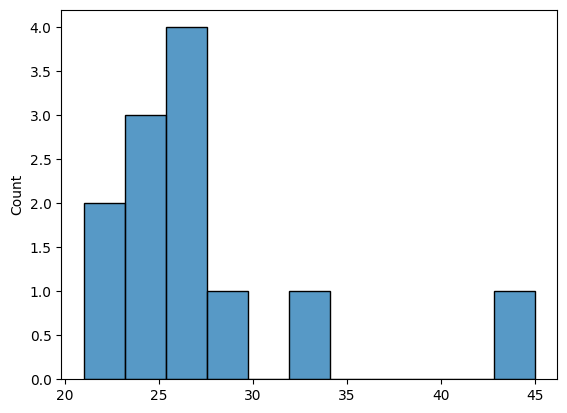

In [20]:
import seaborn as sns

sns.histplot(edades)

Podemos observar que entre aproximadamente 21 y 23 años hay 2 valores, entre 23 y 25 3, entre 25 y 27 hay 4 y entre 27 y 30 hay 1 valor.

Luego entre los 43 y 45 hay 1 valor, lo mismo que entre 33 y 35 aproximadamente.

El histograma forma regiones para contar cuántos datos están en ese intervalo o región llamada **BIN**.

Podemos modificar cuántas regiones queremos utilizar, si no deseamos que las calcule automáticamente. Por ejemplo, cuándo tenemos muchos datos, podemos pensar en 20 regiones que dividan el espacio entre el mínimo y máximo valor en nuestro eje de datos.

<Axes: ylabel='Count'>

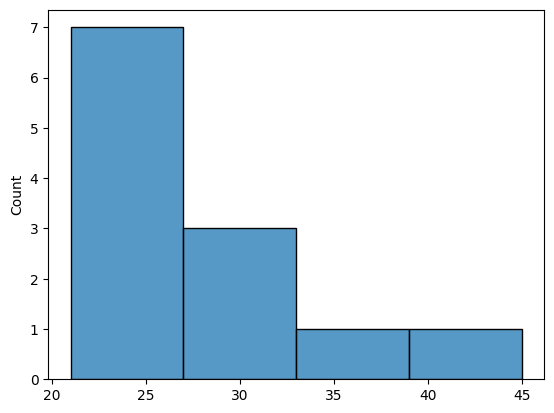

In [21]:
sns.histplot(edades, bins=4)

Esto es útil para ver los 4 grupos más importantes en las edades. Así tendríamos 7 valores para el rango entre 21 y 27 años, tendríamos 3 valores para el ranfo de los 27 a los 33, 1 valor para el rango de los 33 a los 39 años y otro valor para el rango de los 39 a los 45.

Con esto podríamos ver que la distribución se comporta como una **Distribución de Poisson** o **Distribución Gamma** y podríamos centrar el análisis de los 20 a los 33 años que concentran 10 de 12 datos (el 83% de los datos) y descartar el resto.

Con numpy podemos calcular los valores del histograma usando `np.histogram(x, bins=<n>)`.

In [22]:
np.histogram(edades, bins=4)

(array([7, 3, 1, 1]), array([21., 27., 33., 39., 45.]))

El resultado serán dos arreglos, el primero con las alturas del histograma y el segundo con los intervalos (de 21 a 27, de 27 a 33, de 33 a 39 y de 39 a 45).

### Ejercicio: E208 - Visualiza y calcula los valores del histograma de para un eje

Diseña un eje de datos con numpy como el de las edades y visualiza su histograma a 4 bins.

Obtén los valores de los 6 bins y los intervalos del histograma.

Dibuja manualmente el histograma en una hoja.

In [ ]:
# E208 - SOLUCIÓN AQUÍ

## Correlación de datos

El análisis univariable es importante para determinar cómo se comportan nuestros datos sobre el eje, por ejemplo, si estos se glutinan hacía un mismo valor promedio, o están dispersos a lo largo del eje de forma uniforme o sesgada.

Esto nos indica la tendencia de los datos por comportarse como un mismo valor, si la tendencia es alta y su distribución es gaussiana, podremos asumir que los valores son equivalentes al promedio con cierta confianza.

Esto nos permitirá hacer estimaciones para lanzar hipótesis sobre nuestros datos, por ejemplo, hay 95% de confianza que un estudiante de Python Científico tenga entre 23 y 27 años. Y con esto tomar decisiones objetivas a ese segmento de edades.

Sin embargo, es muy común que tengamos múltiples ejes de análisis, por ejemplo, tener los datos de la edad, el peso, la estatura, el salario de la persona, y algunos otros ejes de análisis que darán multidimensionalidad a nuestro análisis.

La correlación entre los datos, es un estimador que nos permite predecir una tendencia positiva, negativa o nula entre dos ejes de análisis.

Si dos ejes de datos se comportan de la misma manera respecto a sus medias, entonces la correlación entre ambos ejes será fuerte, si por el contrario dos ejes se comportan de manera distinta respecto a sus medias, entonces la correlación será baja o nula.

Pensemos en que los valores de un eje de datos son mayores a su media, cuando en otro eje de datos también los datos son mayores a su media y el los datos en el primer eje son menores a su media cuándo en el otro eje también los valores son menores a su media.

Esto significaría que dados dos ejes de análisis $x$ y $y$ se comportan como sigue:

$xi ≥ \overline{x} ⟺ yi ≥ \overline{y}  \land xi ≤ \overline{x} ⟺ yi ≤ \overline{y}$

Podemos cuántificar cuántas veces esto es cierto sumando el producto de las diferencias entre los datos y sus medias:

$\sum_{i = 1}^{n} (x_i - \overline{x}) \cdot (y_i - \overline{y})$

Cuándo ambos sea positivo, el producto sumará algo positivo, y si ambos son negativos, el producto sumará algo positivo, ya que $(-) \cdot (-) → (+)$.

Sólo en el caso que ambos signos sean distintos se sumará algo negativo.

A la correlación positiva se le llama correlación directa y a la correlación negativa se le llama correlación indirecta.

Ambas correlaciones son importantes, la primera que es positiva se le asocia a una tendencia positiva o directa y a la segunda que es negativa se le suele asociar una tendencia inversa o indirecta.

A la correlación entre dos ejes se le suele también llamar covarianza y se denota como:

$COV(x, y) = \frac{\sum_{i}^{n} (x_i - \overline{x}) \cdot (y_i - \overline{y})}{n - 1}$

Notemos que $COV(x, x) = VAR(x)$ usando un grado menos de libertad (estándar).

Interpretar la covarianza es difícil, por lo que podemos usar el **[Coeficiente de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)** también llamado la correlación de los datos.

Este normaliza los valores por sus desviaciones estándar.

$CORR(x, y) = \frac{COV(x, y)}{σ_x \cdot σ_y}$

Donde $σ_x$ y $σ_y$ son las desviaciones estándar de cada eje.

Lo interesante es que la correlación tendrá un valor en el intervalor de $(-1, +1)$ y será `+1` si la correlación es perfecta (directa) o `-1` si es perfecta (inversa).

Si la correlación es alta (cerca de `+1` o `-1`), entonces podemos comenzar a plantear hipótesis sobre nuestros datos y buscar una regresión lineal.

### Ejemplo de correlación entre dos ejes para las estaturas y pesos de personas

Descargaremos el archivo CSV de [https://www.kaggle.com/datasets/majidarif17/weight-and-heightcsv/download?datasetVersionNumber=1](https://www.kaggle.com/datasets/majidarif17/weight-and-heightcsv/download?datasetVersionNumber=1) que contiene el genero, la altura y peso de 10,000 personas.

Buscaremos la correlación entre ambos ejes.

#### 1. Descargamos el dataset

Descargamos el dataset y lo importamos en Google Colab

#### 2. Importamos el dataset con pandas

Importamos el dataset a un DataFrame usando la librería de Pandas y `pd.read_csv(<ruta>)`.

Observa que hemos renombrado las columnas para mejorar los nombres y manipularlos más comodamente.

También especificamos la ruta obtenida por Google Colab.

Finalmente reportamos una muestra aleatoria de 5 muestras para ver sus datos (como resultado de la ejecución de la celda).

In [29]:
import pandas as pd

data = pd.read_csv("/content/weight-height.csv")

data.columns = ["GENERO", "ALTURA", "PESO"]

data.sample(5)

,GENERO,ALTURA,PESO
7792,Female,64.428106,141.214470
3950,Male,74.383715,213.653765
4977,Male,74.043290,219.337909
2706,Male,72.629123,192.328967
6120,Female,62.315752,123.783564


Mostramos los estadísticos fundamentales.

In [30]:
data.describe()

,ALTURA,PESO
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


**NOTA:** La altura está dada en pulgadas y el peso en libras

#### 3. Reconvertimos los ejes a unidades de centímetros y kilogramos

Reemplazamos la columna *ALTURA* dividiéndola por `2.54` para convertirla a centímetros y la columna *PESO* dividiéndola por `0.453592` para convertirla a kilogramos.

In [31]:
data["ALTURA"] = data["ALTURA"] * 2.54
data["PESO"] = data["PESO"] * 0.453592

data.sample(5)

,GENERO,ALTURA,PESO
110,Male,176.003555,85.159790
972,Male,175.756421,84.245278
1932,Male,177.001127,82.525032
1249,Male,174.982815,79.916942
6224,Female,169.227205,64.041412


Volvemos a mostrar los estadísticos.

In [32]:
data.describe()

,ALTURA,PESO
count,10000.000000,10000.000000
mean,168.573602,73.228054
std,9.772721,14.564131
min,137.828359,29.347460
25%,161.304276,61.605982
50%,168.447898,73.124894
75%,175.702625,84.898599
max,200.656806,122.465167


#### 4. Recuperamos los valores de cada eje de análisis

Obtemos los ejes de análisis $x$ y $y$ para obtener su correlación.

In [37]:
x = data["ALTURA"]

x

0       187.571423
1       174.706036
2       188.239668
3       182.196685
4       177.499761
           ...    
9995    168.078536
9996    170.350573
9997    162.224700
9998    175.346978
9999    157.338385
Name: ALTURA, Length: 10000, dtype: float64

In [36]:
y = data["PESO"]

y

0       109.720985
1        73.622732
2        96.497550
3        99.809504
4        93.598619
           ...    
9995     62.041159
9996     77.504315
9997     58.275377
9998     74.322166
9999     51.550324
Name: PESO, Length: 10000, dtype: float64

#### 5. Calculamos la covarianza entre ambos ejes

al hacer `data[<columna>]s` recuperamos la Serie de datos de pandas de cada eje, por lo que podemos calcular la covarianza usando `x.cov(y)` o `y.cov(x)` que debe ser la misma ya que es simétrica.

In [38]:
x.cov(y)

131.62166975807475

#### 6. Calculamos la correlación entre ambos ejes

Podemos calcular la correlación entre dos ejes $x$ y $y$ usando las series de pandas con `x.corr(y)` o `y.corr(x)`.

In [39]:
x.corr(y)

0.9247562987409145

Podemos concluir que la correlación es casi perfecta y positiva.

Esto quiere decir que a mayor altura mayor peso (y viceversa).

### Ejemplo para la visualización de la correlación entre dos ejes

Mediante la librería *Seaborn* que hemos utilizado para visualizar la distribución sobre un eje, también podemos usarla para visualizar la distribución de los datos para dos ejes.

Podemos usar `seaborn.scatterplot(x=<eje x>, y = <eje y>)` para ver la distribución de datos entre dos ejes $x$ y $y$.

<Axes: xlabel='ALTURA', ylabel='PESO'>

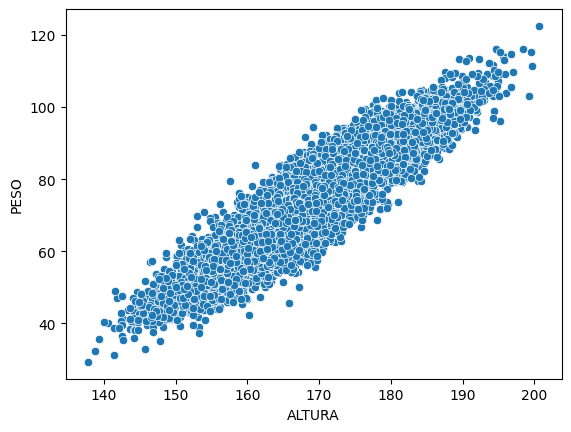

In [40]:
import seaborn as sns

sns.scatterplot(x=x, y=y)

Podemos observar que la correlación es casi perfecta, es decir, a mayor altura, mayor peso.

### Ejercicio: E209 - Diseña un análisis de correlación

Crea o busca un dataset tipo CSV que tenga dos columnas numéricas que creas tienen alta correlación como la estatura y el peso.

Por ejemplo, a mayor nivel educativo,mayor salario (directa), o a mayor salario, menor número de hijos (inversa).

Busca o genera el CSV con datos reales o ficticios y encuentra la covarianza entre ambos ejes y su correlación.

Si la correlación es mayor a `0.9` o a `-0.9` reporta "ALTO GRADO DE CORRELACIÓN" sino reporta "CORRELACIÓN INSUFICIENTE".

In [ ]:
# E209 - SOLUCIÓN AQUÍ

## Regresiones

La regresión de datos permite aproximar los datos de los ejes $x_1$, $x_2$, $x_3$, ..., $x_n$ hacía un eje $y$.

La idea es aproximar un hiperplano, o una recta en dos dimensiones, que tenga la mínima distancia recta hacía el eje, como su sombra de cada dato (punto) sobre la recta imaginaria.

Sobre todas las rectas (o hiperplanos) posibles, encontrar cuál es la que mejor se ajusta a los datos.

![Regresión lineal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/2560px-Linear_regression.svg.png)

En múltiples dimensiones en lugar de una recta, se vería como un híperplano.

![Regresión lineal multivariable](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/lesson02/image_01.gif)

El problema de la regresión se puede resolver encontrando las pendientes $a_1$, $a_2$, $a_3$, ..., $a_n$ y la intercepción (o *bias*) $a_0$ tales que,

$y = a_1 \cdot x_1 + a_2 \cdot x_2 + a_3 \cdot x_3 + ... + a_n \cdot x_n + a_0$

Es decir,

$y = a_0 + \sum_{i = 1}^{n} a_i \cdot x_i$

O formulado también como,

$y = β + \sum_{i = 1}^{n} ω_i \cdot x_i$

Donde $β$ es llamado el *bias* o interceptor (constante de intercepción) y $ω$ es el vector de pesos o coeficientes (pendientes).

Podemos resolver el problema mediante la optimización por mínimos cuadrados.

$f(x, y) = min_{ω_i} \sum_{i = 0}^{n} (y_i - ω_i \cdot x_i)^2 $

O expresado de otra forma,

$f(x, y) = min_{ω} ||y - ω \cdot x||_2^2$

Donde $||u||$ es la norma euclidiana o magnitud de un vector.

Si encontramos los pesos $ω$ que minimicen esa función, entonces encontraremos la recta con pendientes $ω$ y coeficiente de intercepción $β$ (si asumimos $ω_0 = β$ y $x_0 = y_0$).





### Ejemplo de una regresión lineal con sklearn

Podemos usar la librería científica **[Sci-Kit Learn](https://scikit-learn.org/)** para determinar la regresión entre múltiples ejes $x_1$, $x_2$, $x_3$, ..., $x_n$ hacía un eje $y$.

En este ejemplo intentaremos haremos la regresión entre las estaturas y pesos, es decir $x_1$ serán las alturas y $y$ serán los pesos.

#### 1. Importamos el dataset

Como en la correlación de datos descargaremos e importaremos el dataset de alturas y pesos.



In [41]:
import pandas as pd

data = pd.read_csv("/content/weight-height.csv")

data.columns = ["GENERO", "ALTURA", "PESO"]

data["ALTURA"] = data["ALTURA"] * 2.54
data["PESO"] = data["PESO"] * 0.453592

data.sample(5)

,GENERO,ALTURA,PESO
1874,Male,176.829120,81.876500
91,Male,165.702106,82.105583
9874,Female,163.761236,58.146751
1648,Male,171.381671,80.905267
63,Male,170.172082,74.816963


#### 2. Definimos el eje $x_1$ como las alturas

Recuperamos los valores del eje de alturas como el eje x_1

In [42]:
x1 = data["ALTURA"].values

x1

array([187.57142322, 174.70603628, 188.2396677 , ..., 162.22470022,
       175.34697755, 157.33838453])

#### 3. Definimos el eje $y$ como los pesos

In [43]:
y = data["PESO"].values

y

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

#### 4. Importamos el modelo para la regresión lineal

Extraemos el modelo para la regresión lineal desde la librería sklearn y creamos un regresor lineal.


In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg

LinearRegression()

#### 5. Construimos una matriz de aprendizaje $X$

Esto es necesario aunque sólo tengamos un único eje $x_1$, si tuvieramos más podríamos ponerlos en forma matricial.

Observa que usamos la matriz transpuesta para que los ejes queden como columnas.

In [49]:
import numpy as np

X = np.array([
    x1,
    # x2,
    # x3,
    # ...,
    # xn
]).T

X

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

#### 6. Ajustamos el regresor lineal a nuestros datos

Esto hará la optimización por mínimos cuadrados.

El modelo aprenderá que para la matriz $X$ de datos se tiene que hacer la regresión lineal hacía el eje $y$.

In [50]:
reg.fit(X, y)

LinearRegression()

#### 7. Inspeccionamos las pendientes y el bias

Comprobamos el valor de los coeficientes y el interceptor encontrados.

> Coeficientes (uno por cada eje)

In [51]:
reg.coef_

array([1.37814958])

> Interceptor (bias o constante de intercepción)

In [52]:
reg.intercept_

-159.09158430845093

#### 8. Comprobamos que tan fiable es la regresión

Usamos el coeficiente de correlación para saber si los datos tienen buena correlación.

> Evalua que tan buena es la correlación (conocido como $R^2$)

In [53]:
reg.score(X, y)

0.8551742120609958

Observamos que hay buena correlación, pero quizás no suficiente para conclusiones severas.

#### 9. Predecir valores dentro de la regresión

Una vez ajustada la regresión podemos predecir los valores intermedios de la recta o incluso valores más allá de nuestros datos.

Por ejemplo, cuál sería el peso de la regresión para una altura de `170` centímetros, de `190` centímetros o de `120` centímetros.

Podemos construir valores para predecir cuáles serían sus predicciones.

Es decir, para un eje $x_1'$, $x_2'$, $x_3'$, ..., $x_n'$ cuáles serían los valores del eje $y'$

In [54]:
x1_p = np.array([120, 130, 140, 150, 160, 170, 180, 190, 200])

Xp = np.array([
    x1_p,
    #x2_p,
    #x3_p,
    #...,
    #xn_p,
]).T

yp = reg.predict(Xp)

yp

array([  6.2863654 ,  20.06786121,  33.84935702,  47.63085283,
        61.41234864,  75.19384445,  88.97534026, 102.75683607,
       116.53833188])

Podemos observar que alguien de `190` centímetros debería pesar `102.75` kilogramos.

Dentro de los datos, alguien que tiene una altura de `170.17`centímetros tiene un peso de `74.81` kilogramos.

> Registro `63	Male	170.172082	74.816963`

Y según nuestra regresión, alguien que tiene una altura de `170` centímetros debería pesar `75.19` kilogramos, lo cuál es bastante aproximado.

### Ejercicio: E210 - Diseña un análisis de regresión

Crea o busca un dataset que tenga dos ejes de análisis que estén fuertemente correlacionados y ajusta la regresión lineal.

Observa quién será el eje $x_1$ y quién asumirá el eje $y$.

Reporta el valor de las pendientes, el coeficiente de intercepción y predice algunos valores.

In [ ]:
# E210 - SOLUCIÓN AQUÍ

## Clasificadores

El problema de la clasificación de datos es similar a la regresión, en el sentido que podemos crear un modelo que permita aproximar nuestros datos a un modelo capaz de entender qué datos podrían predecir nuestros valores.

La clasificación se utiliza para poder predecir valores categóricos, los cuáles no pueden ser ajustados mediante regresión. Por ejemplo, si el eje $y$ representa si es casado o no, si trabaja o no, si el tipo de edificio es departamentos, casa, hospital, oficinas, centro gubernamental, etc.

La clasificación permite usar modelos de aprendizaje automático de distintas naturalezas, como árboles de decisión, redes neuronales, máquinas de soporte vectorial, k-vecinos, etc.

Uno de los más famosos es el basado en árboles de decisión, el cuál construirá un modelo basado en preguntas de mayor o igual, para separar los datos y determinar la categoría a la que pertenece.

Para esto nuestro eje $y$ debe ser numérico, aunque sea categórico.

Debemos transformar nuestros datos para asociar un número entero a cada categoría.

Podemos pensar el problema de clasificación como,

$y = MODELO(x_1, x_2, x_3, ..., x_n)$

Donde el $MODELO$ representa alguno de los modelos de clasificación como árboles de decisión, redes neuronales, k-vecinos, etc.

### Ejemplo de una clasificación con sklearn

La librería de sklearn nos permite importar modelos de aprendizaje basados en clasificadores, usaremos el clasificador por árboles de decisión.

#### 1. Importamos el dataset

Usaremos el mismo dataset de las alturas y los pesos.

In [55]:
import pandas as pd

data = pd.read_csv("/content/weight-height.csv")

data.columns = ["GENERO", "ALTURA", "PESO"]

data["ALTURA"] = data["ALTURA"] * 2.54
data["PESO"] = data["PESO"] * 0.453592

data.sample(5)

,GENERO,ALTURA,PESO
2014,Male,200.656806,122.465167
1128,Male,176.007186,85.939066
1813,Male,163.480700,67.792766
5173,Female,167.012136,72.706284
3058,Male,169.385078,77.433702


#### 2. Definimos el eje $x_1$ como las alturas y $x_2$ como los pesos

Recuperamos las alturas como el eje $x_1$ y los pesos como el eje $x_2$.

Es decir, intentaremos predecir el género de una persona mediante su altura y peso.

> $x_1$ representa las alturas

In [56]:
x1 = data["ALTURA"].values

x1

array([187.57142322, 174.70603628, 188.2396677 , ..., 162.22470022,
       175.34697755, 157.33838453])

> $x_2$ representa los pesos

In [58]:
x2 = data["PESO"].values

x2

array([109.72098511,  73.62273185,  96.49755015, ...,  58.2753768 ,
        74.32216565,  51.55032378])

#### 3. Definimos el eje y como los géneros

El eje $y$ representará los géneros en dos categorías:

* **Male** - Representa si es hombre, asociamos la categoría `1`
* **Female** - Representa si es mujer, asociamos la categoría `2`

Debemos transformar los datos de las categorías previamente mediante un mapeo de la serie.

In [59]:
y = data["GENERO"].map({ "Male": 1, "Female": 2 }).values

y

array([1, 1, 1, ..., 2, 2, 2])

Obseva que ahora *Male* vale 1 y *Female* vale 2.

#### 4. Importamos el modelo para la clasificación con árboles de decisión

Importamos `DecisionTreeClassifier` desde la librería sklearn y construimos un clasificador.

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf

DecisionTreeClassifier()

#### 5. Construimos una matriz de aprendizaje $X$

Creamos la matriz $X$ con nuestros ejes $x_1$, $x_2$, $x_3$, ..., $x_n$,en nuestro caso solo $x_1$ y $x_2$.

Observa que transponemos la matriz, para que las filas representen los valores y las columnas cada eje.

In [62]:
import numpy as np

X = np.array([
    x1,
    x2,
    #x3,
    #...,
    #xn,
]).T

X

array([[187.57142322, 109.72098511],
       [174.70603628,  73.62273185],
       [188.2396677 ,  96.49755015],
       ...,
       [162.22470022,  58.2753768 ],
       [175.34697755,  74.32216565],
       [157.33838453,  51.55032378]])

#### 6. Ajustamos el clasificador a nuestros datos

Similar a la regresión, el clasificador aprenderá que categoría tienen los valores para los ejes de datos $x_1$, $x_2$, $x_3$, ..., $x_n$.

In [63]:
clf.fit(X, y)

DecisionTreeClassifier()

#### 7. Inspeccionamos los resultados del clasificador

Importamos la función `plot_tree` y la librería gráfica **[Matplotlib](https://matplotlib.org)** para visualizar el árbol de decisión construido.

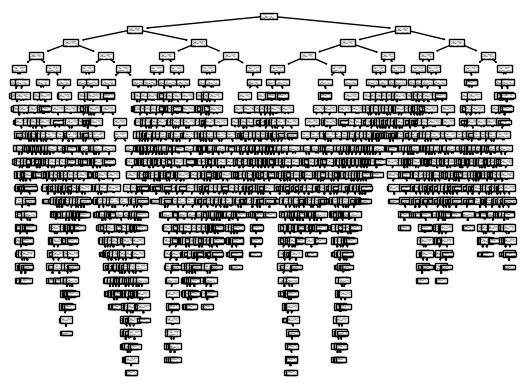

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(clf)

plt.show()

Podemos observar que el árbol de decisión toma muchas decisiones para poder predecir el género.

> Visualizamos sólo las primeras decisiones en el árbol de decisión

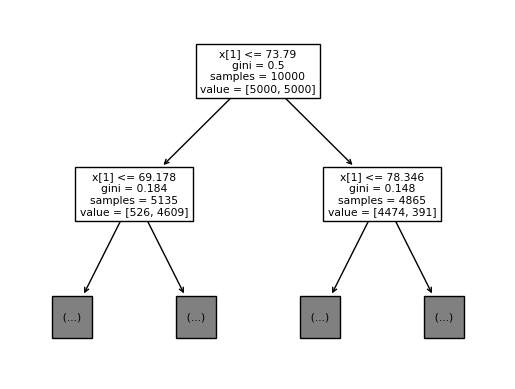

In [69]:
plot_tree(clf, max_depth=1)

plt.show()

En este caso vemos que pregunta si el eje $x_1$ es menor a 73.79 centímetros, y así sucesivamente.

El **Gini** es un índice de la potencia de medición aleatoria en las muestras o entropía de separación de los datos.

En este caso, la entropía tendría que ir decayendo en cada decisión, y separando las muestras lo más posible.

#### 8. Comprobamos que tan fiable es la clasificación

Podemos evaluar que tan confiable es la clasificación, mediante una validación cruzada que separa las muestras en entrenamiento y pruebas aleatorias, para verificar automáticamente que tan bien resulto la clasificación a lo largo de varias pruebas.

Importaremos la función `cross_val_score(MODELO, X, y)` para verificar la precisión de nuestro modelo en múltiples pruebas automáticas.

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y)

scores

array([0.8665, 0.8825, 0.8665, 0.8795, 0.873 ])

> Obtenemos el promedio

In [71]:
scores.mean()

0.8736

Podemos Observar que la prexisión es al rededor del 87%, lo cuál es bastante significativo.

Esto significa que dada una altura y peso, se puede predecir el género de la persona con un 87.3% de confianza.

#### 9. Predecir valores dentro de la clasificación

Podemos estimar valores, es decir, el género asociado a una serie de datos para alturas y pesos, similar como en la regresión.

Es decir, para un eje $x_1'$, $x_2'$, $x_3'$, ..., $x_n'$ cuáles serían los valores del eje $y'$

In [91]:
x1_p = np.array([120, 120, 150, 150, 170, 170, 200, 200])
x2_p = np.array([8, 5, 39, 28, 90, 65, 90, 120])

Xp = np.array([
    x1_p,
    x2_p,
    #x3_p,
    #...,
    #xn_p,
]).T

yp = clf.predict(Xp)

yp

array([2, 2, 2, 2, 1, 2, 1, 1])

Observamos que casi todas esas alturas y pesos han sido clasificadas bajo la categoría 2, es decir *Female* o mujeres.

Sólo hay 87% de confianza en estos resultados.

### Ejercicio: E211 - Diseña un análisis de clasificación

Crea o busca un dataset que tenga tres ejes de análisis, dos de ellos numéricos y el otro categórico, que creas que estén fuertemente correlacionados y ajusta la clasificación de dos ejes numéricos al categórico.

Observa quién será el eje $x_1$ y $x_2$ y quién asumirá el eje categórico $y$.

Reporta el árbol de decisión en sus primeras decisiones, calcula la confianza promedio y haz algunas predicciones.